HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

TTR values and percents are:
[195.8, 195.8, 188, 178, 175]
[-0.10204081632652481, -0.10204081632652481, -4.081632653061225, -9.183673469387756, -10.714285714285715]
Memory values and percents are:
[46, 38, 29, 23, 22]
[-23.333333333333336, -36.66666666666667, -51.66666666666667, -61.66666666666667, -63.333333333333336]


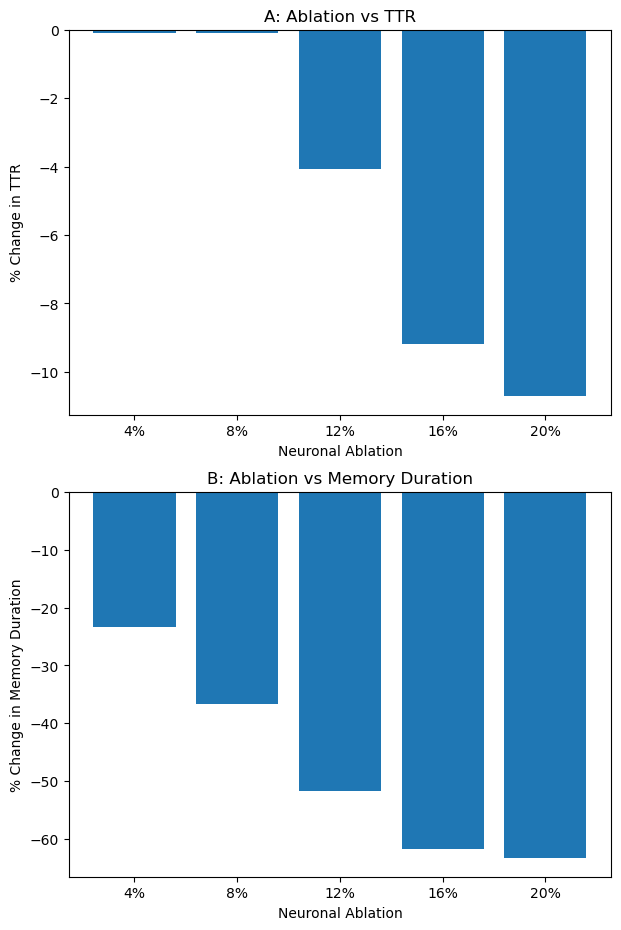

In [4]:
# July 4, 2021
# accuracy v speed
import nengo
import nengo_spa as spa
import matplotlib.pyplot as plt
# with and without seed
import numpy as np
import random
import pickle
# Stewart change
# if decrease number neurons become less accurate?
d = 128  # the dimensionality of the vectors
# note dimension
SDT_variable = 1
proportion_ablate = 0.0
noise_std = 0.000000000000005 
time_interval = 1.0
wait =  0.0
feedback_synapse = 0.1 
feedback = 1.1
threshold = 0.8  

SDT_variable = 1
proportion_ablate = 0.0
noise_std = 0.0000005 
time_interval = 1.0
wait =  0.0
feedback_synapse = 0.1  
feedback = 0.99
threshold = 0.8  

# Empty arrays to store values on each iteration
RT = []
ablation_percent = []
Memory = []

import csv

for i in range (4,21,4):
    proportion_ablate = 0.01*i

    with spa.Network(seed = None) as model:
        noise = nengo.Node(nengo.processes.WhiteNoise(nengo.dists.Gaussian (0,noise_std)), size_out = d)
        vocab = spa.Vocabulary(d)
        vocab.populate("RED; BLUE; GREEN; NOISE")
        BLUE = vocab.parse('BLUE')
        RED = vocab.parse('RED')
        GREEN = vocab.parse('GREEN')
        NOISE = vocab.parse('NOISE')
        
        Color = spa.State(vocab,  subdimensions = 16, neurons_per_dimension = 50,\
                          represent_cc_identity = False, feedback_synapse = 0.1, feedback = feedback)
        nengo.Connection(noise,Color.input, synapse = 0.01)
        
        def input(t):
            if t < 1:
                return RED 
            elif t < 2:
                return BLUE
            elif t < 3:
                return GREEN
            else: 
                return '0'
               

        input_transcode = spa.Transcode(function = input, output_vocab = vocab)
        input_transcode >> Color
        probe_Color = nengo.Probe(Color.output, synapse = 0.01)

        def ablate_ensemble(ens, proportion_ablate, sim, bias=True):
                    n_neurons = min(int(ens.n_neurons * proportion_ablate), ens.n_neurons)
                    idx = np.random.choice(np.arange(ens.n_neurons), replace=False, size=n_neurons)
                    encoder_sig = sim.signals[sim.model.sig[ens]['encoders']]
                    encoder_sig.setflags(write=True)
                    encoder_sig[idx] = 0.0 
                    encoder_sig.setflags(write=False)
                    if bias:

                        bias_sig = sim.signals[sim.model.sig[ens.neurons]['bias']]
                        bias_sig.setflags(write=True)
                        bias_sig[idx] = -1000
 

        with nengo.Simulator(model) as sim:  # Create the simulator
                    for j in range (0, int(d/16)):
                        ens = Color.all_ensembles[j] 
                        ablate_ensemble(ens, proportion_ablate, sim ) 
                    sim.run(1.5)
 
        
 
                    numbers  = spa.similarity(sim.data[probe_Color], vocab, normalize = True)
                    pickle.dump(numbers, open("June30", "wb"))


                    # Get values where data crosses threshold at different loss percents
                    value = 0.8
                    absolute_val_array = np.abs(numbers[1000:1500,1] - value)
                    smallest_difference_index = absolute_val_array.argmin()
                    closest_element = smallest_difference_index 
                    Point = closest_element
                    RT.append(Point)
                    ablation_percent.append(proportion_ablate * 100)
                    
                    # Get Memory Duration
                    value = 0.8
                    absolute_val_array = np.abs(numbers[1000:1500,0] - value)
                    smallest_difference_index = absolute_val_array.argmin()
                    closest_element = smallest_difference_index
                    Point = closest_element
                    Memory.append(Point)
                    
# Plot  
print('TTR values and percents are:')
print(RT)
RT[:] = [(x - 196) / 1.96 for x in RT] #make percent and adjust
print(RT)
ablation_percent = ['4%','8%','12%','16%','20%']

fig, axs = plt.subplots(2, figsize=(7,11)) 
axs[0].bar(ablation_percent,RT)
   
axs[0].set_title("A: Ablation vs TTR" )
axs[0].set_xlabel('Neuronal Ablation')
axs[0].set_ylabel("% Change in TTR")

print('Memory values and percents are:')
print(Memory)
Memory[:] = [((x-60) / .60) for x in Memory] #make percent and adjust
print(Memory)    
axs[1].bar(ablation_percent,Memory) 
axs[1].set_title("B: Ablation vs Memory Duration" )
axs[1].set_xlabel('Neuronal Ablation')
axs[1].set_ylabel("% Change in Memory Duration")

fig.savefig('Ablation.svg')                                                     
fig.savefig('Ablation.png') 
fig.savefig('Ablation.jpg') 
